## R Users’ Salaries from the 2019 Stackoverflow Survey

### Introduction

Stackoverflow has recently released the anonymized results of their 2019 annual developer survey. Let’s take a look on what R users are saying about their salaries. Note that the following results could be biased because of unrepresentative and in some cases small samples.

#### Importing packages 

In [1]:
import pandas as pd
import pycountry_convert as pc
import numpy as np
import re

#### Importing data from csv file

This dataset consists of survey answers from nearly 90,000 respondents. About 5,000 of them reported using R for “extensive development work over the past year”.

We first import assigning to the dataframe 'df', and then subseting the survey respondants who use R as part of their professional work. To achieve this we apply the regex method that extracts the R string from the column 'LanguageWorkedWith'

In [2]:
df = pd.read_csv("C:/Data/csv/survey_results_public.csv")

#### Verifying number of rows in csv file

In [3]:
df.shape

(88883, 85)

In [4]:
df.size

7555055

In [5]:
df.count().sum()

6526205

In [6]:
num_nans = df.size - df.count().sum()
num_nans

1028850

In [7]:
df.fillna(0)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,0,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,0,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",0,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,0,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,0,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,0,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,0,...,0,Tech articles written by other developers;Tech...,0.0,Man,No,0,0,No,Appropriate in length,Easy
88879,88601,0,No,Never,The quality of OSS and closed source software ...,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
88880,88802,0,No,Never,0,Employed full-time,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
88881,88816,0,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0


#### Subset of respondants who use R as part of their work

The first filter used (table data_r) reduces the dataset from 88,883 respondents to 5,048. The second filter excludes students, hobby programmers and former developers. The third filter excludes unemployed and retired respondents, and finally, we exclude respondents from an unknown country and respondents with unknown or zero salary (variable ConvertedComp). The final dataset size is 3,034 rows (respondents).

In [8]:
#Filtering LanguageWorkedWith
data_r = df[df.LanguageWorkedWith.str.contains('^R$', regex=True, na=False) 
            |
            df.LanguageWorkedWith.str.contains(';R$', regex=True, na=False) 
            | 
            df.LanguageWorkedWith.str.contains(';R;', regex=True, na=False) 
            | 
            df.LanguageWorkedWith.str.contains('^R;', regex=True, na=False)]
data_r.shape

(5048, 85)

In [9]:
#Filtering MainBranch
data_r2 = data_r[(data_r.MainBranch == 'I am a developer by profession')
                 | 
                 (data_r.MainBranch == 'I am not primarily a developer, but I write code sometimes as part of my work')]
#Filtering Employment
data_r3 = data_r2[(data_r2.Employment == 'Employed full-time') 
                  | 
                  (data_r2.Employment == 'Employed part-time') 
                  | 
                  (data_r2.Employment == 'Independent contractor, freelancer, or self-employed')]
#Filtering Countries
data_r4 = data_r3[(data_r3.Country != 'Other Country (Not Listed Above)')]
#Filtering 0 salaries
data_r5 = data_r4[(data_r4.ConvertedComp > 0)]
data_r5['Country'] = data_r5['Country'].replace({'Russian Federation':'Russia'})
data_r5.shape

C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(3034, 85)

#### Grouping the data

This table will contain the number of R users and their median annual USD salary by country. 
After that, we would need to restrict the data to show only the countries that has at least 10 R users.

As noted in the below table, United States has the highest median annual salary at 110,000 USD, followed by Israel and Norway.
 

In [10]:
#groups R users by country aggregating the quantity of those users and the mean value of their salaries
users_by_country = data_r5.groupby("Country").agg(
    n_r_users = pd.NamedAgg(column = "ConvertedComp", aggfunc = "count"),
    median = pd.NamedAgg(column = "ConvertedComp", aggfunc = "median"))

#sorts the users on descending order by the median of salaries(variable ConvertedComp)
data_grouped = users_by_country.sort_values('median', ascending=False)
R_users_median = data_grouped.reset_index()
R_users = R_users_median[(R_users_median.n_r_users >= 10)]
R_users.head(40)

,Country,n_r_users,median
2,United States,1100,110000.0
3,Israel,21,98964.0
4,Norway,21,88871.0
5,Switzerland,51,85596.0
6,Denmark,24,85260.0
8,Australia,79,78332.0
12,United Kingdom,190,68695.0
13,Canada,105,64888.0
15,Germany,197,61872.0
16,Ireland,20,61754.0


#### Country-Continents

This table will contain country-continent information. To get this information, first we will isolate the country column from the last grouped table we generated. Then we will import the country_converter package so we can map every country to its correspondant continent. Then, after the subset of data for countries is generated, we will generate an array with the values.


In [11]:
countries1 = R_users.loc[:, "Country"]
countries1.values

array(['United States', 'Israel', 'Norway', 'Switzerland', 'Denmark',
       'Australia', 'United Kingdom', 'Canada', 'Germany', 'Ireland',
       'New Zealand', 'Japan', 'Belgium', 'Sweden', 'Netherlands',
       'Finland', 'South Africa', 'Austria', 'France', 'Italy',
       'Slovenia', 'Spain', 'Poland', 'Czech Republic', 'Lithuania',
       'Chile', 'Russia', 'Ukraine', 'China', 'Greece', 'Portugal',
       'Mexico', 'Hungary', 'Brazil', 'Argentina', 'Bulgaria', 'Turkey',
       'India', 'Iran', 'Pakistan'], dtype=object)

Here we will make a short version for every country in the list of countries2, using the function convert to_short from country-convert. In the list we have names like 'Hong Kong (S.A.R.)' and 'Venezuela, Bolivarian Republic of...' for example, that will be easier to handle in their short version 'Hong Kong' and 'Venezuela' respectively. Note: Just paste the content of the array contries1 in the new list created countries2. Then, in the variable countries3, we will call the country converter package to get the short names.

In [12]:
import country_converter as coco
countries2 = ['United States', 'Germany', 'United Kingdom', 'India', 'Canada',
       'Netherlands', 'France', 'Brazil', 'Australia', 'Spain', 'Italy',
       'Switzerland', 'Russia', 'Poland', 'Austria', 'Sweden', 'Mexico',
       'Belgium', 'Finland', 'Denmark', 'Israel', 'Norway',
       'Czech Republic', 'Ireland', 'New Zealand', 'Greece', 'Portugal',
       'Chile', 'Turkey', 'Bulgaria', 'Slovenia', 'South Africa', 'Iran',
       'China', 'Hungary', 'Japan', 'Pakistan', 'Ukraine', 'Argentina',
       'Lithuania']

countries3 = coco.convert(names=countries2, to='name_short')

#### Mapping continent names to country names

Now that we have a list of countries, is time to map that list to continents. We will keep using pycountry package, creating a dictionary of continents and then mapping each of them to the countries.

In [13]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'EU': 'Europe',
    'OC': 'Australia',
    'AF': 'Africa',
}
countries4 = ['United States','Germany','United Kingdom','India','Canada','Netherlands','France','Brazil','Australia','Spain','Italy','Switzerland','Russia','Poland','Austria','Sweden','Mexico','Belgium','Finland','Denmark','Israel','Norway','Czech Republic','Ireland','New Zealand','Greece','Portugal','Chile','Turkey','Bulgaria','Slovenia','South Africa','Iran','China','Hungary','Japan','Pakistan','Ukraine','Argentina','Lithuania']
continents = [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries4]

In [14]:
len(countries4)

40

#### Creating a table for Countries and Continents

Once that all countries had been mapped to their respective continent, it is time to make a separate table to store Countries and Continents.

In [15]:
co_co = pd.DataFrame(
    {'Country': countries4,
     'Continents': continents,
    })
co_co

,Country,Continents
0,United States,North America
1,Germany,Europe
2,United Kingdom,Europe
3,India,Asia
4,Canada,North America
5,Netherlands,Europe
6,France,Europe
7,Brazil,South America
8,Australia,Australia
9,Spain,Europe


#### Creating a table 

This table will contain the data with the fisrt filter we performed 'data_r5', the table that contains the number of R users by country 'R_users_byCountry' and the country-continents table 'co-co'

In [16]:
r_users = R_users.merge(co_co, on='Country', how='left')
r_users2 = r_users.merge(data_r5, on='Country', how='left')
r_users3 = r_users2[['Country','n_r_users', 'median','Continents','ConvertedComp']]

## Start plotting with plotnine

#### Salary Distributions by Country

To start plotting we will use plotnine package

Our variable of interest is called ConvertedComp and is defined as “salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.”

Annual salary distributions are visualized below by boxplots. To avoid displaying (too much) noise, we limit ourselves to countries with at least five reported R users.

In [17]:
from plotnine import *
import numpy as np
%matplotlib inline

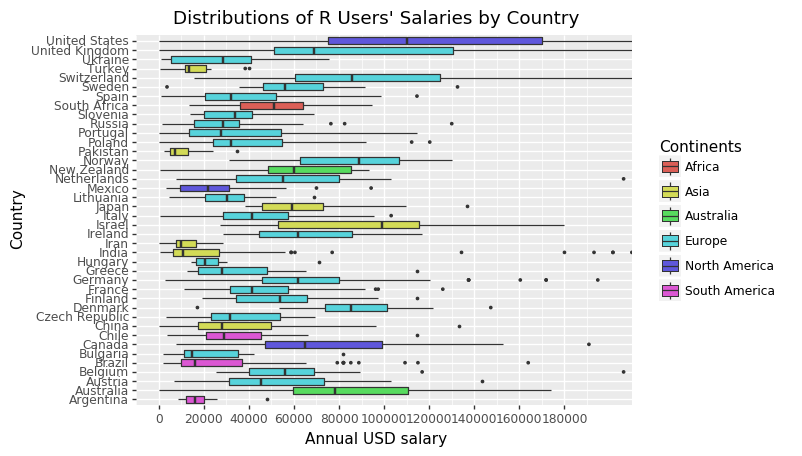

<ggplot: (89230954216)>

In [18]:
#fig1
(
    ggplot(r_users3)
 + aes(x='Country', y='ConvertedComp', fill='Continents')
 + geom_boxplot(outlier_size = 0.5)
 + ylab('Annual USD salary')
 + coord_flip(ylim = (0, 200000))
 + scale_y_continuous(
     breaks = range(0,200000,20000),
     labels = range(0,200000,20000))
 + ggtitle("Distributions of R Users' Salaries by Country")
 + scale_fill_discrete(name = "Continents")
)

#### Salary Distributions for United States

Let’s have a quick look at R users’ salary distributions by some interesting variables for country with the highest number of respondents (1,100).

In [19]:
data_USA1 =  data_r4.loc[data_r4['Country'] == 'United States']
data_USA2 = data_USA1.loc[data_USA1['Age'] >= 20]

C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_boxplot : Removed 141 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_jitter : Removed 141 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


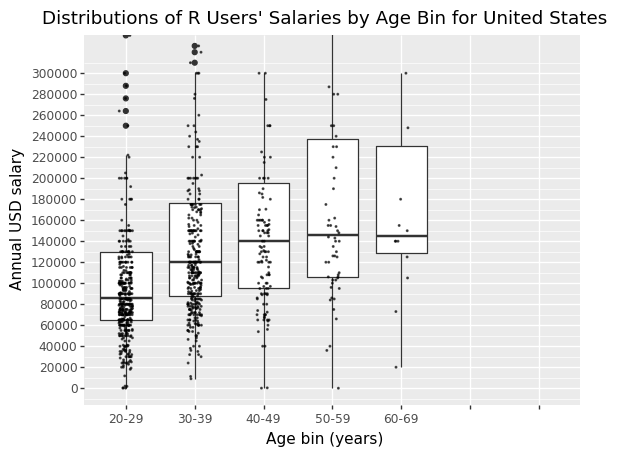

<ggplot: (-9223371947609488047)>

In [20]:
#fig2
(
    ggplot(data_USA2)
 + aes(x=np.floor(data_USA2['Age']/10).astype(object), 
       y='ConvertedComp')
 + geom_boxplot(outlier_shape = 'o')
 + coord_cartesian(ylim = (0, 320000))   
 + geom_jitter(
     aes(x=np.floor(data_USA2['Age']/10).astype(object), 
         y='ConvertedComp'),
     width = 0.1, 
     height = 0,
     alpha = 0.6,
     size = 0.2)
 + scale_y_continuous(
     breaks = range(0, 320000, 20000),
     labels = range(0, 320000, 20000))
 + ylab('Annual USD salary')
 + xlab('Age bin (years)')
 + ggtitle("Distributions of R Users' Salaries by Age Bin for United States")   
 + scale_x_discrete(labels = ['20-29','30-39','40-49','50-59','60-69'])  
)

The median of the second age group is is about 40% higher than the median of the first one. The median of the third age group is is about 17% higher than the median of the second one. The median of the fourth age group is is about 6% higher than the median of the third one. Note that a few respondents reported salaries very close to zero.

#### Distribution of R User's salaries by Gender

Now let's analyze this slice of the data, first thing we'd have to do is to look what are the labels in the Gender column in Dataframe. 

After that we will need to slice the data in the categories we are interested, they are 'Man', Women' and 'Others'. From the first verification we realize that, there is another category different from Man and Women, we will replace this by 'Other', in order to make easier the visualization. 

In [21]:
data_USA1.Gender.unique()

array(['Man', 'Non-binary, genderqueer, or gender non-conforming',
       'Woman', nan,
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [22]:
data_gender = data_USA1[data_USA1.Gender.str.contains('^Man$', regex=True, na=False) 
                      | 
                      data_USA1.Gender.str.contains('^Woman$', regex=True, na=False) 
                      | 
                      data_USA1.Gender.str.contains('^Non-binary, genderqueer, or gender non-conforming$', regex=True, na=False)]

In [23]:
data_gender['Gender'].replace({'Non-binary, genderqueer, or gender non-conforming':'Other'},inplace=True)
data_gender.Gender.count()

C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


1270

Now that we have replaced this category, let's see our new categories:

In [24]:
data_gender.Gender.unique()

array(['Man', 'Other', 'Woman'], dtype=object)

#### Plotting the gender data

We will plot the salaries by Gender in US, coming from the newly created data.

C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_boxplot : Removed 186 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_jitter : Removed 186 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


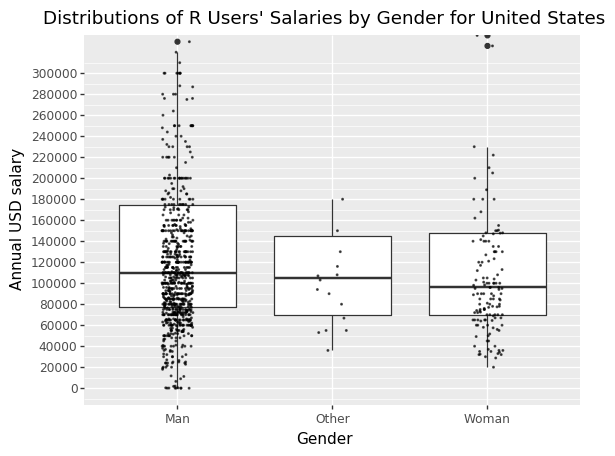

<ggplot: (89245266671)>

In [25]:
#fig3
(
    ggplot(data_gender)
 + aes(x=data_gender['Gender'].astype(object), 
       y='ConvertedComp')
 + geom_boxplot(outlier_shape = 'o')
 + coord_cartesian(ylim = (0, 320000))   
 + geom_jitter(
     aes(x=data_gender['Gender'].astype(object), 
         y='ConvertedComp'),
     width = 0.1, 
     height = 0,
     alpha = 0.6,
     size = 0.2)
 + scale_y_continuous(
     #limits = (0, 300000),
     breaks = range(0, 320000, 20000),
     labels = range(0, 320000, 20000))
 + ylab('Annual USD salary')
 + xlab('Gender')
 + ggtitle("Distributions of R Users' Salaries by Gender for United States")   
# + scale_x_discrete(labels = ['20-29','30-39','40-49','50-59','60-69'])  
)

#### Plotting Education level for the R Users in US

The last figure that we will generate is the Education level for R users in US, as analyzed in prior figures, first let's see what we have in the 'EdLevel' column. Secondly we'll remove all nan values from the column analyzed, and then plot the results.

In [26]:
data_USA1.EdLevel.unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [27]:
data_USA1.EdLevel.replace(np.nan,None,inplace=True)

C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_boxplot : Removed 211 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_jitter : Removed 211 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


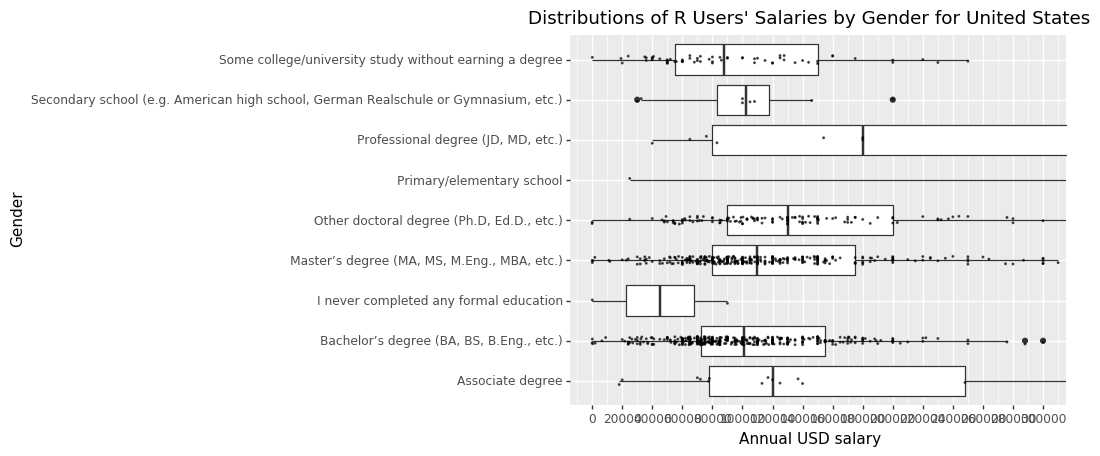

<ggplot: (-9223371947609523512)>

In [28]:
#fig4
(
    ggplot(data_USA1)
 + aes(x='EdLevel', 
       y='ConvertedComp')
 + geom_boxplot(outlier_shape = 'o')
 + geom_jitter(
     aes(x='EdLevel', 
         y='ConvertedComp'),
     width = 0.1, 
     height = 0,
     alpha = 0.6,
     size = 0.2)
 + scale_y_continuous(
     #limits = (0, 300000),
     breaks = range(0, 320000, 20000),
     labels = range(0, 320000, 20000))
 + coord_flip(ylim = (0, 300000))   
 + ylab('Annual USD salary')
 + xlab('Gender')
 + ggtitle("Distributions of R Users' Salaries by Gender for United States")   
)

After we have dive into this complete dataset, we can analyze and play with all the features and categories taken in account for this survey, group, plot and analyze all this beautiful data.